In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir=(f"/content/drive/MyDrive/Major/flowers/flowers")


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
def data_augment(image):
  p_spatial =tf.random.uniform([],0,1.0, dtype=tf.float32)
  p_rotate =tf.random.uniform([],0,1.0, dtype=tf.float32)
  p_pixel_1 =tf.random.uniform([],0,1.0, dtype=tf.float32)
  p_pixel_2 =tf.random.uniform([],0,1.0, dtype=tf.float32)
  p_pixel_3 =tf.random.uniform([],0,1.0, dtype=tf.float32)

  #Flips
  image=tf.image.random_flip_left_right(image)
  image=tf.image.random_flip_up_down(image)

  if p_spatial >0.75:
    image=tf.image.transpose(image)

  #Rotates
  if p_rotate> 0.75:
    image=tf.image.rot90(image,k=3) #rotate 270
  elif p_rotate > 0.5:
    image=tf.image.rot90(image,k=2) #rotate 180
  elif p_rotate > 0.25:
    image=tf.image.rot90(image,k=1) #rotate 90

  #Pixel_Level tramsform:
  if p_pixel_1>= 0.4:
     image=tf.image.random_saturation(image,lower=0.7,upper=1.3)
  if p_pixel_2>= 0.4:
     image=tf.image.random_contrast(image,lower=0.8,upper=1.2)
  if p_pixel_3>= 0.4:
     image=tf.image.random_brightness(image, max_delta=0.1)

  return image

In [ ]:
#import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
train_datagen=ImageDataGenerator(rescale=1/255.,
                                 validation_split= 0.2,
                                 preprocessing_function =data_augment
                                 )
# test_datagen =ImageDataGenerator(rescale=1/255.)

train_data= train_datagen.flow_from_directory(train_dir,target_size=(224,224), subset="training",batch_size=64)
test_data= train_datagen.flow_from_directory(train_dir,target_size=(224,224), subset="validation",batch_size=64,shuffle=False)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


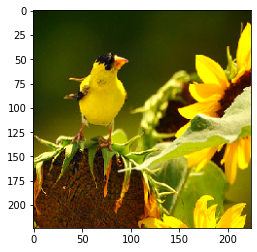

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


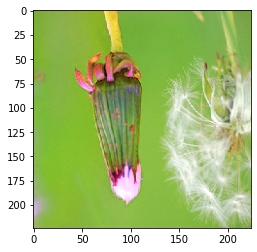

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


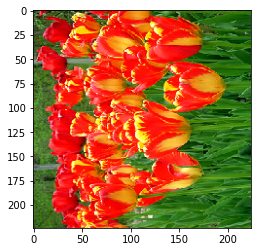

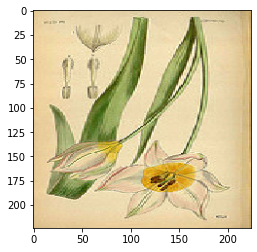

In [ ]:
x= train_data.next()
for i in range(18,22):
  image=x[0][i]
  aug=data_augment(image)
  plt.imshow(image)
  plt.show()

In [ ]:
train_data.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
train_data[0][0][1].shape

(224, 224, 3)

In [ ]:
from keras.layers import Flatten,Dense, Conv2D, AveragePooling2D, Dropout, MaxPool2D, Rescaling ,BatchNormalization, Activation,GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam

**custom model 1**

In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(64,7,padding='same',strides=(4,4),activation='relu',input_shape=(224,224,3)),
                           tf.keras.layers.MaxPool2D(strides=(2,2),padding="same"),
                           tf.keras.layers.Conv2D(32,5,padding='same',strides=(2,2),activation='relu'),
                           tf.keras.layers.MaxPool2D(strides=(2,2),padding="same"),
                           tf.keras.layers.Conv2D(32,3,padding='same',activation='relu'),
                           tf.keras.layers.GlobalAveragePooling2D(),
                           tf.keras.layers.Dense(20,activation='relu'),
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.Dense(5,activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 64)        9472      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 global_average_pooling2d (G  (None, 32)               0

In [ ]:
earlystopping=tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                               min_delta =1e-4,
                                               patience=6,
                                               mode='max',
                                               restore_best_weights =True,
                                               verbose=1)
callbacks=[earlystopping]

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss = "categorical_crossentropy", metrics=['accuracy'])

In [ ]:
history = model.fit(train_data,
                    epochs=20,
                    validation_data=test_data,
                    use_multiprocessing=True,
                    callbacks=callbacks)

Epoch 1/20
48/55 [=========================>....] - ETA: 1:28 - loss: 1.6055 - accuracy: 0.2144

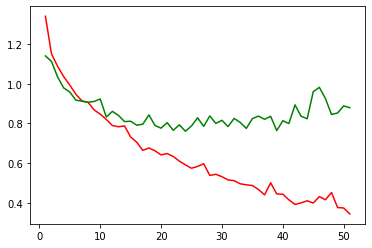

In [ ]:
plt.plot([x for x in range(1,len(history.history["loss"])+1)],history.history["loss"],c="red")
plt.plot([x for x in range(1,len(history.history["loss"])+1)],history.history["val_loss"],c="green")

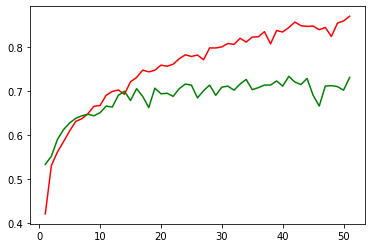

In [ ]:
plt.plot([x for x in range(1,len(history.history["accuracy"])+1)],history.history["accuracy"],c="red")
plt.plot([x for x in range(1,len(history.history["accuracy"])+1)],history.history["val_accuracy"],c="green")

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       152
           1       0.79      0.84      0.81       210
           2       0.66      0.56      0.60       156
           3       0.79      0.77      0.78       146
           4       0.63      0.71      0.67       196

    accuracy                           0.73       860
   macro avg       0.74      0.73      0.73       860
weighted avg       0.73      0.73      0.73       860



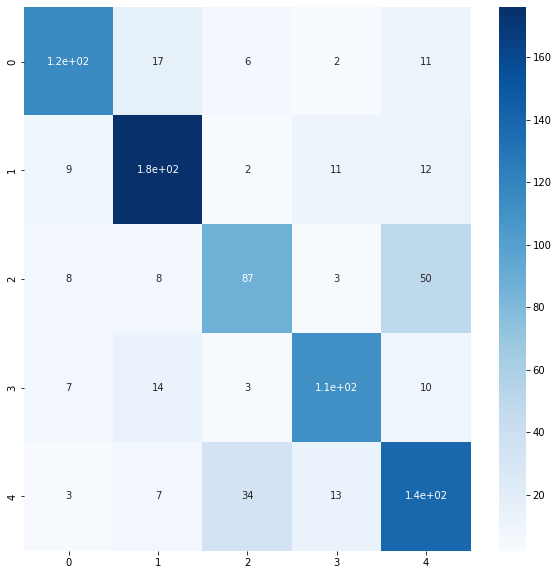

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
predicted_classes=np.argmax(model.predict(test_data, steps=test_data.n // test_data.batch_size+1), axis=-1)
true_classes=test_data.classes
#class_labels=list(test_data.class_indices.keys())

confusionmatrix=tf.math.confusion_matrix(true_classes,predicted_classes)
plt.figure(figsize=(10,10))
sns.heatmap(confusionmatrix, cmap='Blues', annot =True ,cbar=True)

print(classification_report(true_classes,predicted_classes))